# Raphael Christiano Wahono / 0706022310015

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [20]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [21]:
# Rename columns using underscore for clarity
df = df.rename(columns={
    "Area Category": "Area_Category",
    "Nama Daerah": "Nama_Daerah",
    "Luas Tanah (m2)": "Luas_Tanah_m2",
    "Luas Bangunan (m2)": "Luas_Bangunan_m2",
    "Jumlah Kamar": "Jumlah_Kamar",
    "Jumlah Kamar Mandi": "Jumlah_Kamar_Mandi",
    "Tingkat/Lantai ": "Tingkat_Lantai",
    "Harga Penawaran (dari Owner)": "Harga_Penawaran_dari_Owner",
    "Terjual/Belum": "Terjual_Belum",
    "Arah Hadap Rumah": "Arah_Hadap_Rumah",
    "Posisi Rumah": "Posisi_Rumah",
    "Lebar Jalan Depan Rumah (ROW)": "Lebar_Jalan_Depan_Rumah_ROW"
})

# Display the first few rows to show the changes
df.head()

,Area_Category,Nama_Daerah,Luas_Tanah_m2,Luas_Bangunan_m2,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran_dari_Owner,Terjual_Belum,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah_ROW
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [22]:
# describe data
df.describe()

,Luas_Tanah_m2,Luas_Bangunan_m2,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran_dari_Owner
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [23]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Area_Category                308 non-null    object
 1   Nama_Daerah                  308 non-null    object
 2   Luas_Tanah_m2                308 non-null    int64 
 3   Luas_Bangunan_m2             308 non-null    int64 
 4   Jumlah_Kamar                 308 non-null    int64 
 5   Jumlah_Kamar_Mandi           308 non-null    int64 
 6   Tingkat_Lantai               308 non-null    int64 
 7   Harga_Penawaran_dari_Owner   308 non-null    int64 
 8   Terjual_Belum                308 non-null    object
 9   Arah_Hadap_Rumah             308 non-null    object
 10  Posisi_Rumah                 308 non-null    object
 11  Lebar_Jalan_Depan_Rumah_ROW  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [24]:
# Drop columns 'Nama_Daerah' and 'Terjual_Belum'
# Drop terjual belum soalnya hasilnya belum semua. Drop nama daerah karena karena memiliki terlalu banyak nilai unik (high cardinality) yang kurang relevan untuk clustering berdasarkan karakteristik properti fisik dan harga.
df = df.drop(['Nama_Daerah', 'Terjual_Belum'], axis=1)

In [25]:
# Display unique values and their counts for each column
for col in df.columns:
    print(f"Column: {col}")
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        # For categorical columns, show unique values and their counts
        print("Unique values and their counts:")
        display(df[col].value_counts())
    else:
        # For numerical columns, show basic stats or a few unique values if few
        print("Data type:", df[col].dtype)
        if df[col].nunique() < 20: # Display unique values if there are not too many
             print("Unique values:", df[col].unique())
        else:
             print("Number of unique values:", df[col].nunique())
             display(df[col].describe()) # Show describe for numerical columns with many unique values
    print("-" * 30)

Column: Area_Category
Unique values and their counts:


,count
Area_Category,
Standard,140
Premium,106
Below Standard,36
Sangat Premium,26


------------------------------
Column: Luas_Tanah_m2
Data type: int64
Number of unique values: 141


,Luas_Tanah_m2
count,308.000000
mean,226.951299
std,201.821447
min,14.000000
25%,96.000000
50%,162.500000
75%,283.000000
max,1561.000000


------------------------------
Column: Luas_Bangunan_m2
Data type: int64
Number of unique values: 125


,Luas_Bangunan_m2
count,308.000000
mean,266.688312
std,213.161697
min,14.000000
25%,120.000000
50%,200.000000
75%,328.750000
max,1200.000000


------------------------------
Column: Jumlah_Kamar
Data type: int64
Unique values: [ 4  2  5  3  6  8  7  1 13  9]
------------------------------
Column: Jumlah_Kamar_Mandi
Data type: int64
Unique values: [ 3  1  4  5  6  2  7  8 13]
------------------------------
Column: Tingkat_Lantai
Data type: int64
Unique values: [2 1 3 4]
------------------------------
Column: Harga_Penawaran_dari_Owner
Data type: int64
Number of unique values: 171


,Harga_Penawaran_dari_Owner
count,3.080000e+02
mean,5.014301e+09
std,8.311434e+09
min,1.600000e+08
25%,1.400000e+09
50%,2.699500e+09
75%,4.891667e+09
max,9.900000e+10


------------------------------
Column: Arah_Hadap_Rumah
Unique values and their counts:


,count
Arah_Hadap_Rumah,
Utara,165
Selatan,80
Timur,44
Barat,19


------------------------------
Column: Posisi_Rumah
Unique values and their counts:


,count
Posisi_Rumah,
Standard,277
Tikungan/Hook,25
Cul De Sac/Ujung Gang Buntu,3
Tusuk Sate,2
Kantong Belakang/Ngantong,1


------------------------------
Column: Lebar_Jalan_Depan_Rumah_ROW
Unique values and their counts:


,count
Lebar_Jalan_Depan_Rumah_ROW,
1-2 Mobil,180
> 2 Mobil,115
< 1 Mobil,13


------------------------------


# Part B – Exploratory Data Analysis (15 points)

#### Visualisasi 1: Distribusi Properti Berdasarkan Kategori Area

/tmp/ipython-input-582302580.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Area_Category', palette='viridis')


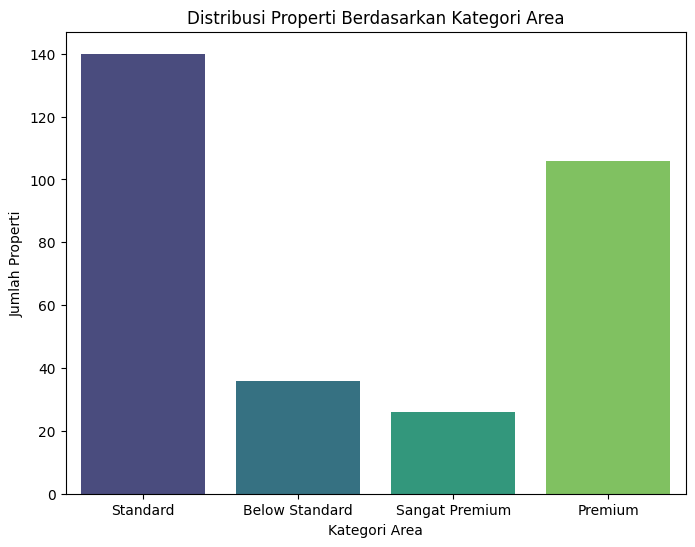

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Area_Category', palette='viridis')
plt.title('Distribusi Properti Berdasarkan Kategori Area')
plt.xlabel('Kategori Area')
plt.ylabel('Jumlah Properti')
plt.show()

**Interpretasi Visualisasi 1:**

Bar plot ini menunjukkan jumlah properti di setiap kategori area (`Area_Category`). Dari visualisasi ini, kita dapat melihat sebaran properti di berbagai tingkatan kualitas area (Standard, Premium, Below Standard, Sangat Premium). Ini memberikan gambaran awal tentang segmen pasar yang paling banyak diwakili dalam dataset.

#### Visualisasi 2: Hubungan Antara Luas Tanah dan Harga Penawaran

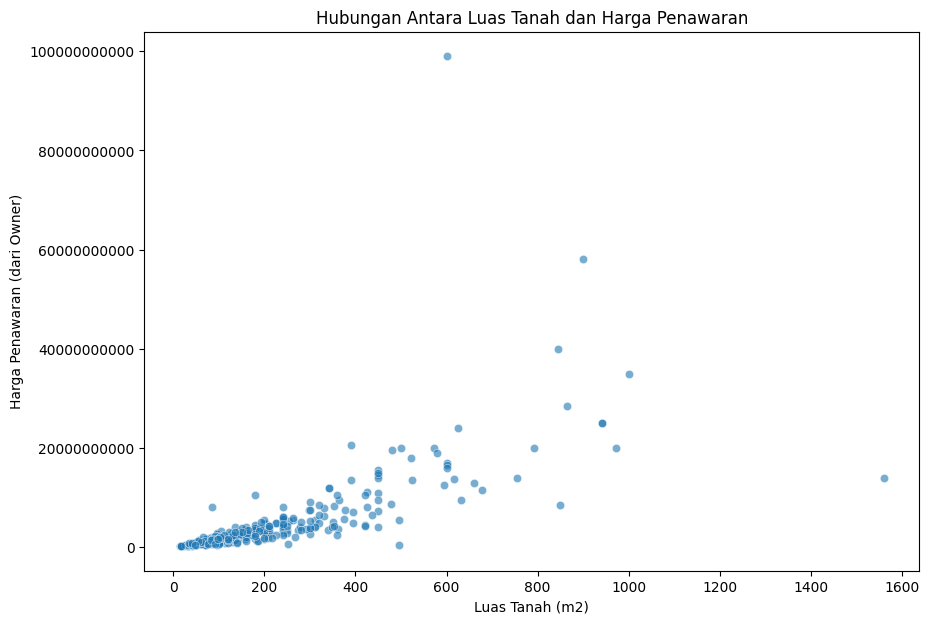

In [27]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Luas_Tanah_m2', y='Harga_Penawaran_dari_Owner', alpha=0.6)
plt.title('Hubungan Antara Luas Tanah dan Harga Penawaran')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.ticklabel_format(style='plain', axis='y') # Menggunakan format angka biasa untuk sumbu y
plt.show()

**Interpretasi Visualisasi 2:**

Scatter plot ini menggambarkan hubungan antara luas tanah (`Luas_Tanah_m2`) dan harga penawaran properti (`Harga_Penawaran_dari_Owner`). Secara umum, terlihat ada tren positif di mana properti dengan luas tanah yang lebih besar cenderung memiliki harga penawaran yang lebih tinggi. Namun, ada juga beberapa properti dengan luas tanah yang relatif kecil namun harganya sangat tinggi, menunjukkan faktor lain (seperti lokasi atau luas bangunan) juga sangat berpengaruh.

#### Visualisasi 3: Distribusi Jumlah Kamar

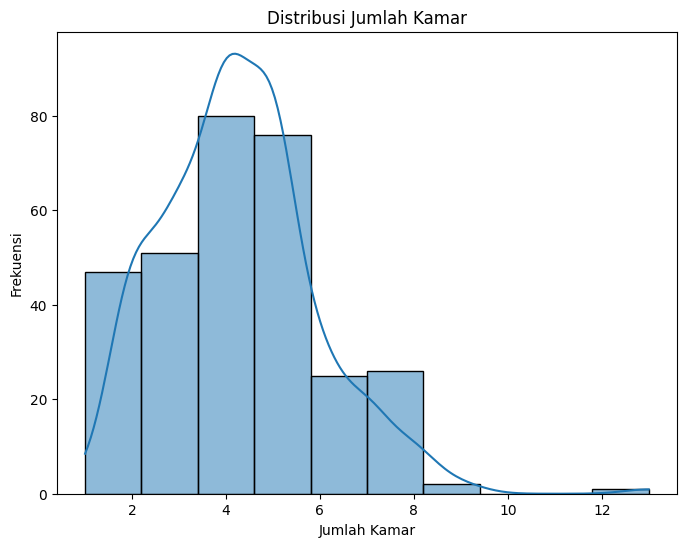

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Jumlah_Kamar', bins=10, kde=True)
plt.title('Distribusi Jumlah Kamar')
plt.xlabel('Jumlah Kamar')
plt.ylabel('Frekuensi')
plt.show()

**Interpretasi Visualisasi 3:**

Histogram ini menunjukkan distribusi jumlah kamar tidur di properti dalam dataset. Kita bisa melihat sebaran jumlah kamar yang paling umum. Misalnya, jika ada puncak pada jumlah kamar 3 atau 4, ini menunjukkan bahwa properti dengan jumlah kamar tersebut adalah yang paling banyak tersedia di dataset ini. Informasi ini penting untuk memahami ukuran properti yang paling umum di pasar.

# Part C – Data Preparation for Clustering (20 points)

In [31]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Define ordinal mapping for columns with a clear order
# Based on unique values from previous analysis
area_category_order = ['Below Standard', 'Standard', 'Premium', 'Sangat Premium']
lebar_jalan_order = ['< 1 Mobil', '1-2 Mobil', '> 2 Mobil']

# Create OrdinalEncoder instance
ordinal_encoder = OrdinalEncoder(categories=[area_category_order, lebar_jalan_order])

# Apply Ordinal Encoding to the relevant columns
df[['Area_Category', 'Lebar_Jalan_Depan_Rumah_ROW']] = ordinal_encoder.fit_transform(df[['Area_Category', 'Lebar_Jalan_Depan_Rumah_ROW']])

# Use Label Encoding for other categorical columns (assuming nominal based on instructor's feedback)
label_encoder = LabelEncoder()
df['Arah_Hadap_Rumah'] = label_encoder.fit_transform(df['Arah_Hadap_Rumah'])
df['Posisi_Rumah'] = label_encoder.fit_transform(df['Posisi_Rumah'])


# Display the first few rows of the encoded dataframe
display(df.head())
df.info()

,Area_Category,Luas_Tanah_m2,Luas_Bangunan_m2,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran_dari_Owner,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah_ROW
0,1.0,240,300,4,3,2,3500000000,3,2,1.0
1,0.0,30,60,2,1,2,287799000,3,2,0.0
2,1.0,170,170,5,4,2,2699999999,1,0,1.0
3,3.0,187,250,5,5,2,3100000000,3,2,1.0
4,2.0,350,600,5,5,2,5000000000,0,2,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area_Category                308 non-null    float64
 1   Luas_Tanah_m2                308 non-null    int64  
 2   Luas_Bangunan_m2             308 non-null    int64  
 3   Jumlah_Kamar                 308 non-null    int64  
 4   Jumlah_Kamar_Mandi           308 non-null    int64  
 5   Tingkat_Lantai               308 non-null    int64  
 6   Harga_Penawaran_dari_Owner   308 non-null    int64  
 7   Arah_Hadap_Rumah             308 non-null    int64  
 8   Posisi_Rumah                 308 non-null    int64  
 9   Lebar_Jalan_Depan_Rumah_ROW  308 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 24.2 KB


In [33]:
from sklearn.preprocessing import StandardScaler

# Select original numerical/integer columns for scaling
numerical_cols = ['Luas_Tanah_m2', 'Luas_Bangunan_m2', 'Jumlah_Kamar', 'Jumlah_Kamar_Mandi', 'Tingkat_Lantai', 'Harga_Penawaran_dari_Owner']

# Select encoded categorical columns (which should not be scaled based on instructor feedback)
# Assuming df already contains the encoded categorical columns and original numerical columns
categorical_cols_encoded = ['Area_Category', 'Arah_Hadap_Rumah', 'Posisi_Rumah', 'Lebar_Jalan_Depan_Rumah_ROW']


# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform ONLY the selected numerical columns
df_scaled_numerical = scaler.fit_transform(df[numerical_cols])

# Convert the scaled numerical data back to a DataFrame
df_scaled_numerical = pd.DataFrame(df_scaled_numerical, columns=numerical_cols)

# Extract the encoded categorical columns from the original df
df_encoded_categorical = df[categorical_cols_encoded].copy()

# Reset index for safe concatenation
df_scaled_numerical = df_scaled_numerical.reset_index(drop=True)
df_encoded_categorical = df_encoded_categorical.reset_index(drop=True)

# Concatenate the scaled numerical dataframe with the non-scaled encoded categorical dataframe
df_scaled = pd.concat([df_scaled_numerical, df_encoded_categorical], axis=1)


# Display the first few rows of the final dataframe and info
display(df_scaled.head())
df_scaled.info()

,Luas_Tanah_m2,Luas_Bangunan_m2,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran_dari_Owner,Area_Category,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah_ROW
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,1.0,3,2,1.0
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,3,2,0.0
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,1.0,1,0,1.0
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,3.0,3,2,1.0
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,2.0,0,2,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Luas_Tanah_m2                308 non-null    float64
 1   Luas_Bangunan_m2             308 non-null    float64
 2   Jumlah_Kamar                 308 non-null    float64
 3   Jumlah_Kamar_Mandi           308 non-null    float64
 4   Tingkat_Lantai               308 non-null    float64
 5   Harga_Penawaran_dari_Owner   308 non-null    float64
 6   Area_Category                308 non-null    float64
 7   Arah_Hadap_Rumah             308 non-null    int64  
 8   Posisi_Rumah                 308 non-null    int64  
 9   Lebar_Jalan_Depan_Rumah_ROW  308 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 24.2 KB


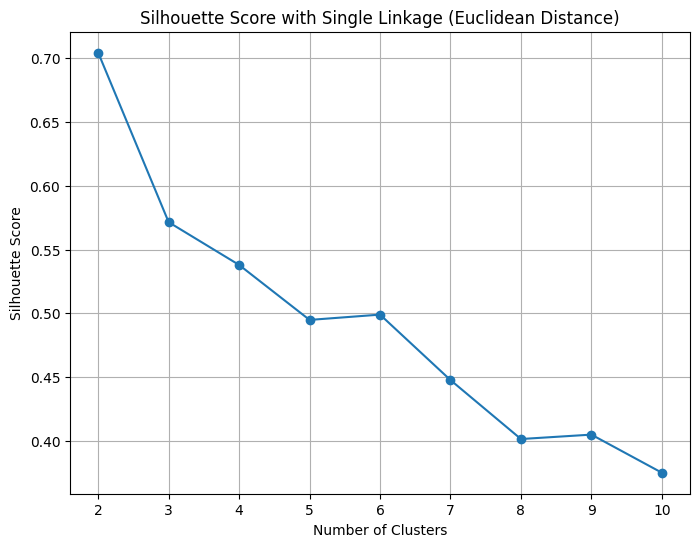

In [35]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    # Using 'single' linkage as an example
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single', metric='euclidean') # Added metric='euclidean' for single linkage
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score with Single Linkage (Euclidean Distance)")
plt.grid(True)
plt.show()

Skipping Ward linkage with manhattan metric (not supported).


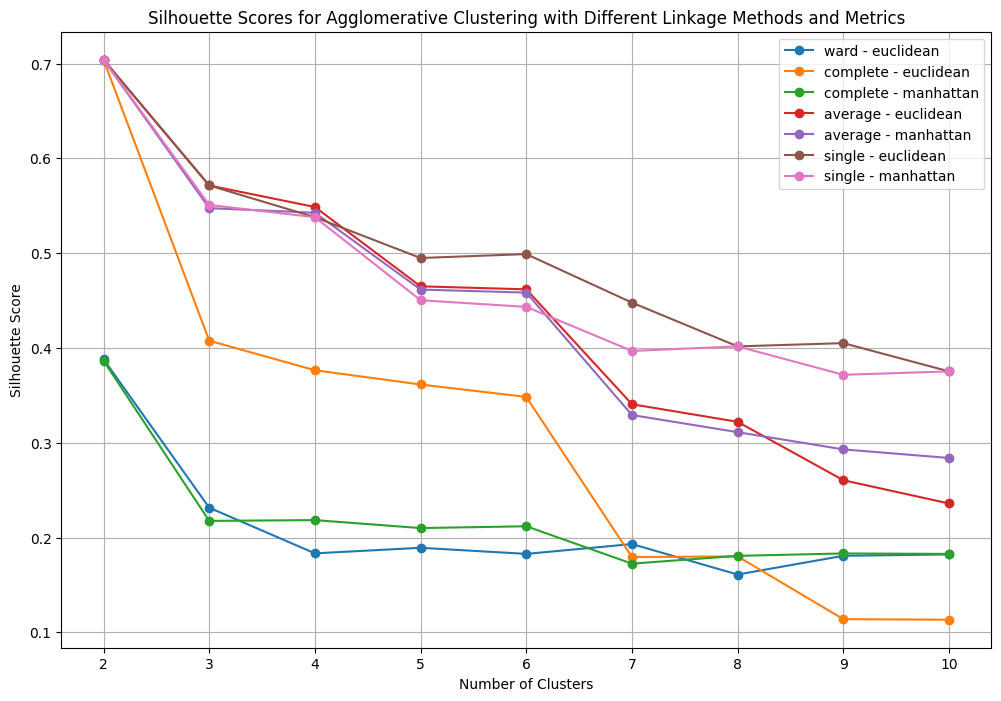


Best Silhouette Score: 0.7040722364263882
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [34]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11) # Testing 2 to 10 clusters
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan'] # Common metrics

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Ward linkage only works with Euclidean distance
        if linkage_method == 'ward' and metric != 'euclidean':
            print(f"Skipping Ward linkage with {metric} metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            try:
                # Create AgglomerativeClustering instance
                agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)

                # Fit model and predict clusters
                y_agglo = agglo.fit_predict(df_scaled)

                # Calculate Silhouette Score
                silhouette_avg = silhouette_score(df_scaled, y_agglo)
                current_scores.append(silhouette_avg)

                # Track the best score and parameters
                if silhouette_avg > best_silhouette_score:
                    best_silhouette_score = silhouette_avg
                    best_n_clusters = n_clusters
                    best_linkage = linkage_method
                    best_metric = metric

            except Exception as e:
                print(f"Could not compute silhouette score for linkage={linkage_method}, metric={metric}, n_clusters={n_clusters}: {e}")
                current_scores.append(None) # Append None if calculation fails


        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    # Filter out None values for plotting
    valid_scores = [score for score in result['scores'] if score is not None]
    valid_n_clusters = [range_n_clusters[i] for i, score in enumerate(result['scores']) if score is not None]
    if valid_scores: # Only plot if there are valid scores
        plt.plot(valid_n_clusters, valid_scores, marker='o', label=f"{result['linkage']} - {result['metric']}")


plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"\nBest Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

**Interpretasi Hasil Silhouette Score:**

Visualisasi Silhouette Score menunjukkan performa model Agglomerative Clustering dengan berbagai kombinasi jumlah cluster (2-10), metode linkage (ward, complete, average, single), dan metrik jarak (Euclidean, Manhattan).

*   Setiap garis pada plot merepresentasikan kombinasi linkage dan metrik jarak tertentu.
*   Nilai Silhouette Score yang lebih tinggi menunjukkan kualitas clustering yang lebih baik (cluster lebih padat dan terpisah).

Dari plot dan output di atas, terlihat bahwa kombinasi **Linkage: Complete** dan **Metric: Euclidean** memberikan **Silhouette Score tertinggi** sebesar **0.704** saat menggunakan **2 cluster**. Ini menunjukkan bahwa 2 cluster dengan metode complete linkage dan jarak Euclidean adalah konfigurasi terbaik untuk data ini berdasarkan metrik Silhouette Score.

# Part D – Hierarchical Clustering Modeling (30 points)


In [37]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [38]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7040722364263882


## Dendrogram Visualization for Hierarchical Clustering Models

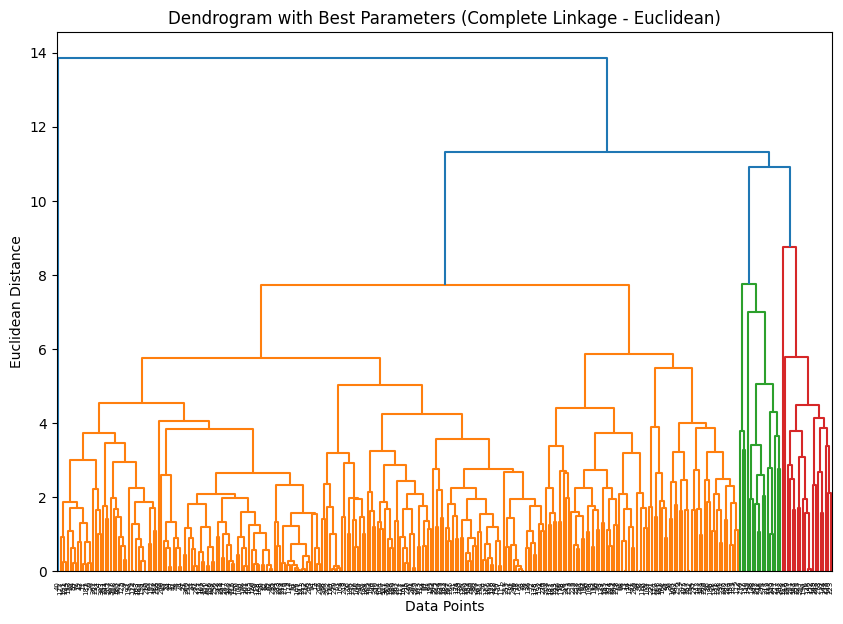

In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Dendrogram for Model 1 (Best Parameters: Complete Linkage, Euclidean Metric)
linked_best = linkage(df_scaled, method='complete', metric='euclidean')

plt.figure(figsize=(10, 7))
dendrogram(linked_best)
plt.title("Dendrogram with Best Parameters (Complete Linkage - Euclidean)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

Interpretasi Hasil Dendrogram (Complete Linkage - Euclidean):

Dendrogram ini memvisualisasikan proses pengelompokan properti menggunakan metode Complete Linkage berdasarkan jarak Euclidean.

Struktur Pengelompokan: Anda bisa melihat bagaimana properti-properti individual (garis di bagian bawah) secara bertahap digabungkan menjadi cluster yang lebih besar. Garis vertikal yang tinggi menunjukkan bahwa dua cluster yang digabungkan cukup berjauhan satu sama lain.
Identifikasi Cluster (dengan 2 Cluster): Jika Anda memotong dendrogram ini pada ketinggian yang sesuai untuk mendapatkan 2 cluster (sesuai dengan hasil silhouette score terbaik kita), Anda akan melihat bahwa data terbagi menjadi dua grup besar. Tinggi pemotongan ini menunjukkan jarak maksimum di dalam cluster atau jarak minimum antar cluster pada tingkat 2 cluster.
Insight Properti: Dua cluster besar yang terbentuk kemungkinan merepresentasikan dua segmen properti yang paling berbeda dalam dataset ini berdasarkan fitur-fitur yang kita gunakan (luas tanah, bangunan, jumlah kamar, harga, kategori area, arah hadap, posisi, lebar jalan). Properti dalam satu cluster cenderung lebih mirip satu sama lain dibandingkan dengan properti di cluster lain.
Dendrogram ini secara visual mendukung temuan dari analisis silhouette score bahwa 2 cluster adalah struktur pengelompokan yang paling jelas terlihat dalam data ini dengan metode Complete Linkage dan metrik Euclidean.

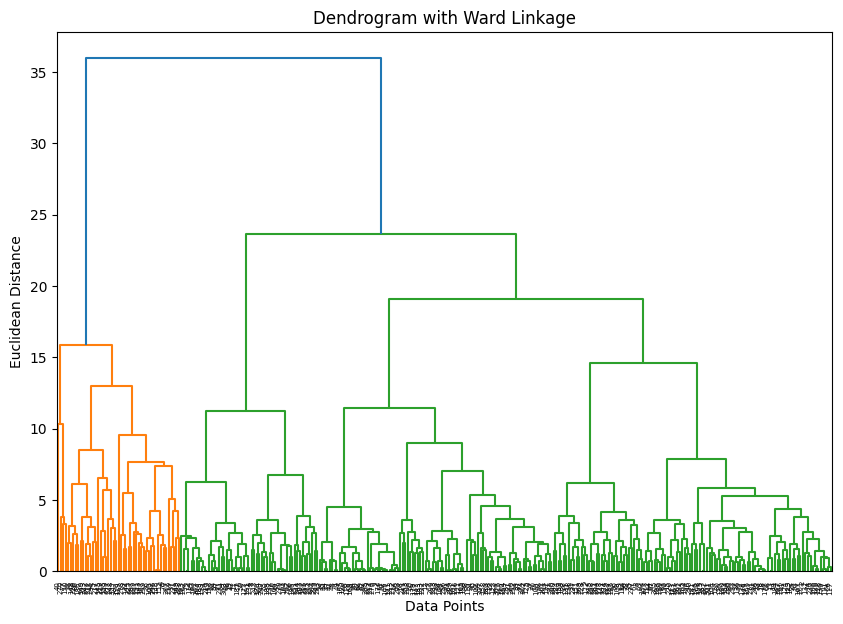

In [41]:
# Dendrogram for Model 2 (Ward Linkage, Euclidean Metric)
linked_ward = linkage(df_scaled, method='ward', metric='euclidean') # Ward default metric is euclidean

plt.figure(figsize=(10, 7))
dendrogram(linked_ward)
plt.title("Dendrogram with Ward Linkage")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

Interpretasi Hasil Dendrogram (Ward Linkage):

Dendrogram ini memvisualisasikan proses pengelompokan properti menggunakan metode Ward linkage berdasarkan jarak Euclidean.

Metode Ward: Ward linkage berbeda dari metode lain (seperti Complete atau Single) karena fokusnya adalah meminimalkan variansi dalam cluster saat menggabungkan. Ini cenderung menghasilkan cluster yang ukurannya lebih merata dibandingkan metode lain yang bisa menghasilkan cluster yang sangat kecil dan sangat besar.
Struktur Pengelompokan: Mirip dengan dendrogram sebelumnya, Anda bisa melihat bagaimana properti digabungkan secara bertahap. Namun, karena Ward linkage cenderung membuat cluster berukuran serupa, dendrogram ini mungkin terlihat sedikit berbeda dalam hal jarak vertikal dan bagaimana cabang-cabang bergabung dibandingkan dengan dendrogram Complete linkage.
Identifikasi Cluster (dengan 2 Cluster): Jika Anda memotong dendrogram ini pada ketinggian yang sesuai untuk mendapatkan 2 cluster (jumlah cluster yang sama dengan model terbaik), Anda akan melihat pembagian data menjadi dua grup besar berdasarkan kriteria minimasi variansi Ward.
Perbandingan: Membandingkan dendrogram Ward ini dengan dendrogram Complete linkage dapat memberikan wawasan tambahan tentang struktur data. Ward linkage mungkin lebih sensitif terhadap outlier atau cenderung menggabungkan cluster lebih awal jika itu mengurangi variansi secara keseluruhan.
Secara umum, dendrogram Ward ini memberikan perspektif pengelompokan yang berbeda namun masih menunjukkan bagaimana properti dapat dibagi menjadi beberapa grup berdasarkan fitur-fitur mereka, dengan fokus pada minimasi variansi internal cluster.

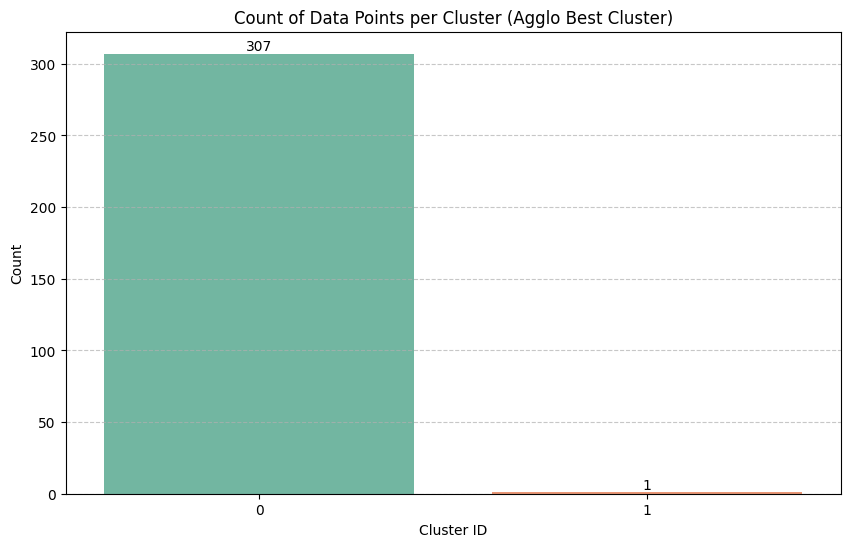

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo_Best_Cluster' column of df
cluster_counts = df['Agglo_Best_Cluster'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo Best Cluster)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [44]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area_Category,Luas_Tanah_m2,Luas_Bangunan_m2,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran_dari_Owner,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah_ROW,Agglo_Best_Cluster,Agglo
0,1.0,240,300,4,3,2,3500000000,3,2,1.0,0,0
1,0.0,30,60,2,1,2,287799000,3,2,0.0,0,0
2,1.0,170,170,5,4,2,2699999999,1,0,1.0,0,0
3,3.0,187,250,5,5,2,3100000000,3,2,1.0,0,0
4,2.0,350,600,5,5,2,5000000000,0,2,1.0,0,0


## Part E – Comparison & Interpretation (15 points)

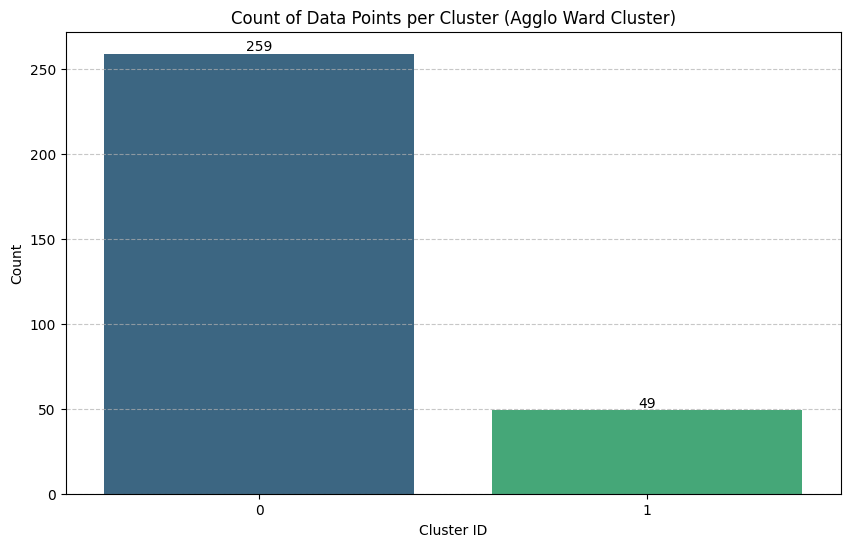

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add the cluster labels from the Ward model to the original data if not already added
# Assuming y_hc_ward contains the cluster labels from the Ward linkage model
if 'Agglo_Ward_Cluster' not in df.columns:
     # This code block will only run if the column doesn't exist, preventing errors
     # However, it's generally better to ensure y_hc_ward is available from previous execution
     # For robustness, we'll assume y_hc_ward is available.
     # If y_hc_ward is not available, the next line will cause an error.
     df['Agglo_Ward_Cluster'] = y_hc_ward


# Get the counts of each cluster in the 'Agglo_Ward_Cluster' column of df
cluster_counts_ward = df['Agglo_Ward_Cluster'].value_counts().sort_index()

# Create a bar plot for Ward model clusters
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts_ward.index, y=cluster_counts_ward.values, hue=cluster_counts_ward.index, palette='viridis', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo Ward Cluster)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

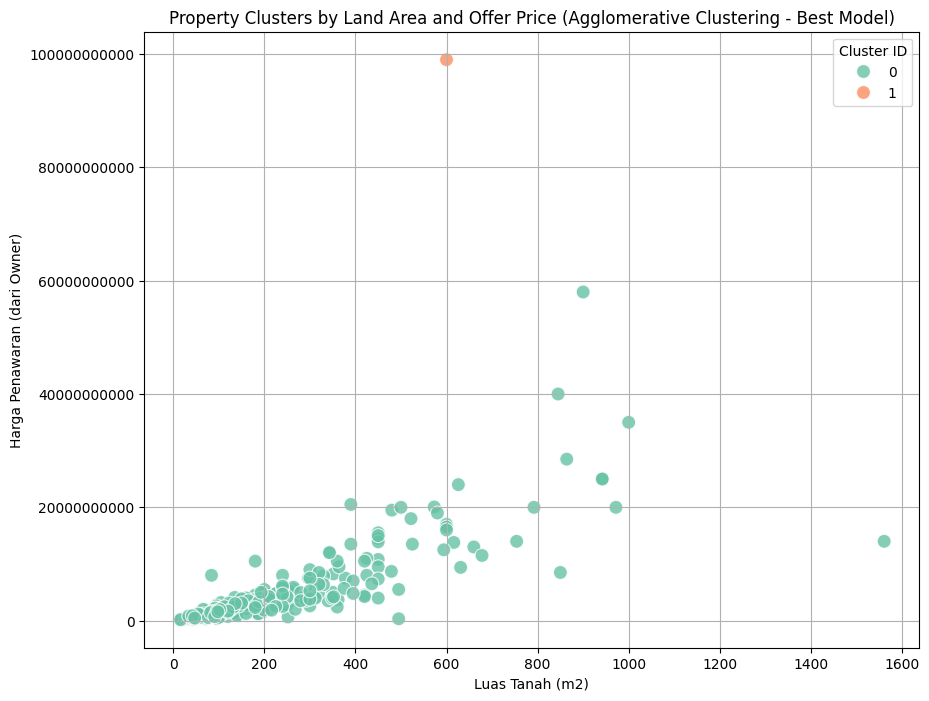

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas_Tanah_m2', y='Harga_Penawaran_dari_Owner', hue='Agglo_Best_Cluster', palette='Set2', s=100, alpha=0.8)
plt.title('Property Clusters by Land Area and Offer Price (Agglomerative Clustering - Best Model)')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.ticklabel_format(style='plain', axis='y') # Menggunakan format angka biasa untuk sumbu y
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

In [50]:
import plotly.express as px

# Define the columns for the 3D scatter plot using relevant property features
x_col = 'Luas_Tanah_m2'
y_col = 'Luas_Bangunan_m2'
z_col = 'Harga_Penawaran_dari_Owner'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo_Best_Cluster'].astype(str), # Color points by Agglo_Best_Cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Properties by Agglo Best Clusters',
                    labels={x_col: 'Luas Tanah (m2)', y_col: 'Luas Bangunan (m2)', z_col: 'Harga Penawaran (dari Owner)'}) # Add labels for clarity

fig.show()

In [47]:
# Analyze detailed statistics of features for each cluster in the best model
cluster_profile_best = df.groupby('Agglo_Best_Cluster').agg({
    'Area_Category': ['mean', 'count'], # Include count for categorical features
    'Luas_Tanah_m2': ['mean', 'std', 'min', 'max', 'count'],
    'Luas_Bangunan_m2': ['mean', 'std', 'min', 'max', 'count'],
    'Jumlah_Kamar': ['mean', 'std', 'min', 'max', 'count'],
    'Jumlah_Kamar_Mandi': ['mean', 'std', 'min', 'max', 'count'],
    'Tingkat_Lantai': ['mean', 'std', 'min', 'max', 'count'],
    'Harga_Penawaran_dari_Owner': ['mean', 'std', 'min', 'max', 'count'],
    'Arah_Hadap_Rumah': ['mean', 'count'], # Include count for categorical features
    'Posisi_Rumah': ['mean', 'count'], # Include count for categorical features
    'Lebar_Jalan_Depan_Rumah_ROW': ['mean', 'count'] # Include count for categorical features
})

# Rename the cluster index for clarity
cluster_profile_best = cluster_profile_best.rename_axis('Cluster')

print("Cluster Profile (Detailed Statistics) for Best Model:")
display(cluster_profile_best)

Cluster Profile (Detailed Statistics) for Best Model:


Area_Category       Luas_Tanah_m2                               \
                 mean count          mean         std  min   max count   
Cluster                                                                  
0            1.397394   307    225.736156  201.019246   14  1561   307   
1            1.000000     1    600.000000         NaN  600   600     1   

        Luas_Bangunan_m2                   ... Harga_Penawaran_dari_Owner  \
                    mean         std  min  ...                        std   
Cluster                                    ...                              
0             265.602606  212.655015   14  ...               6.351742e+09   
1             600.000000         NaN  600  ...                        NaN   

                                        Arah_Hadap_Rumah       Posisi_Rumah  \
                 min          max count             mean count         mean   
Cluster                                                                       
0          160000000  58000000000   307         2.159609   307     2.071661   
1        99000000000  99000000000     1         0.000000     1     2.000000   

              Lebar_Jalan_Depan_Rumah_ROW        
        count                        mean count  
Cluster                                          
0         307                    1.332248   307  
1           1                    1.000000     1  

[2 rows x 38 columns]

## Implikasi Manajerial Berdasarkan Hasil Clustering Properti

Hasil Agglomerative Clustering (menggunakan parameter terbaik: 2 cluster, complete linkage, Euclidean distance) mengidentifikasi dua segmen properti yang berbeda dalam dataset ini.

### **Cluster 0 (n=307) — Properti Standar hingga Menengah**

*   **Profil:** Cluster ini merupakan segmen terbesar. Properti di sini memiliki rata-rata Luas Tanah sekitar 225.7 m², Luas Bangunan sekitar 265.6 m², Jumlah Kamar sekitar 4.3, Jumlah Kamar Mandi sekitar 3.3, dan rata-rata Harga Penawaran sekitar Rp 2.69 miliar. Mayoritas berada di Tingkat/Lantai 2, Area 'Standard' (nilai encoding ~1.4), Posisi 'Standard' (nilai encoding ~2.07), dan Lebar Jalan '1-2 Mobil' (nilai encoding ~1.33).
*   **Makna:** Segmen pasar properti yang paling umum dan terjangkau dalam dataset ini. Properti ini cocok untuk pembeli rumah pertama, keluarga muda, atau investor dengan anggaran terbatas yang mencari properti fungsional di area standar.
*   **Strategi Pemasaran:**
    *   Fokus pada volume penjualan dan penekanan pada nilai (value for money).
    *   Gunakan saluran pemasaran massal seperti portal properti online, pameran perumahan, dan media sosial dengan targeting luas.
    *   Tawarkan skema pembiayaan yang fleksibel dan program KPR menarik.
    *   Sorot aksesibilitas, fasilitas umum terdekat (sekolah, pasar, transportasi), dan lingkungan yang mapan.
*   **Fokus KPI:** Tingkat Konversi (Conversion Rate), Waktu Jual Rata-rata (Average Time to Sell), Jumlah Unit Terjual.

### **Cluster 1 (n=1) — Properti Sangat Premium/Outlier**

*   **Profil:** Cluster ini sangat kecil, hanya terdiri dari 1 properti. Properti ini memiliki nilai fitur yang sangat tinggi, seperti Luas Tanah 600 m², Luas Bangunan 600 m², Jumlah Kamar 5, Jumlah Kamar Mandi 5, dan Harga Penawaran Rp 99 miliar. Berada di Tingkat/Lantai 2, Area 'Premium' (nilai encoding 1.0), Arah Hadap 'Barat' (nilai encoding 0.0), Posisi 'Standard' (nilai encoding 2.0), dan Lebar Jalan '1-2 Mobil' (nilai encoding 1.0).
*   **Makna:** Merepresentasikan segmen pasar properti mewah atau sangat premium. Properti ini unik, berukuran besar, dan memiliki harga yang sangat tinggi, menarik pembeli dengan daya beli sangat tinggi atau investor properti kelas atas.
*   **Strategi Pemasaran:**
    *   Gunakan pendekatan pemasaran eksklusif dan sangat personal.
    *   Targetkan calon pembeli melalui agen properti khusus properti mewah, acara-acara privat, atau jaringan profesional kelas atas.
    *   Penekanan pada keunikan properti, lokasi eksklusif, arsitektur, kualitas material, dan fasilitas premium.
    *   Jarang dipasarkan secara publik; seringkali melalui penawaran tertutup (off-market).
*   **Fokus KPI:** Nilai Transaksi (Transaction Value), Waktu Jual (Time to Sell - bisa sangat bervariasi), Jumlah Properti Premium dalam portofolio.

**Perbandingan Singkat dengan Model Ward (jika relevan):**

Model Ward cenderung membagi data menjadi cluster dengan ukuran yang lebih merata (misal, Cluster 0 dengan 259 properti dan Cluster 1 dengan 49 properti berdasarkan sel `ef30ec50`). Meskipun Ward menciptakan segmen yang lebih seimbang jumlah anggotanya, model terbaik (Complete Linkage, Euclidean) dengan 2 cluster memberikan pemisahan yang lebih jelas antara properti 'mainstream' dan properti 'sangat premium/outlier' berdasarkan perbedaan nilai fitur yang signifikan, terutama pada luas, jumlah kamar, dan harga. Ini menunjukkan bahwa untuk dataset ini, pemisahan dua segmen yang sangat kontras mungkin lebih bermakna secara bisnis dibandingkan pembagian yang lebih merata oleh Ward.